# Empirical PDF functions

How to calculate the PDF, CDF and SF from empirical data.

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as inter

Text(0, 0.5, 'Observed PDF')

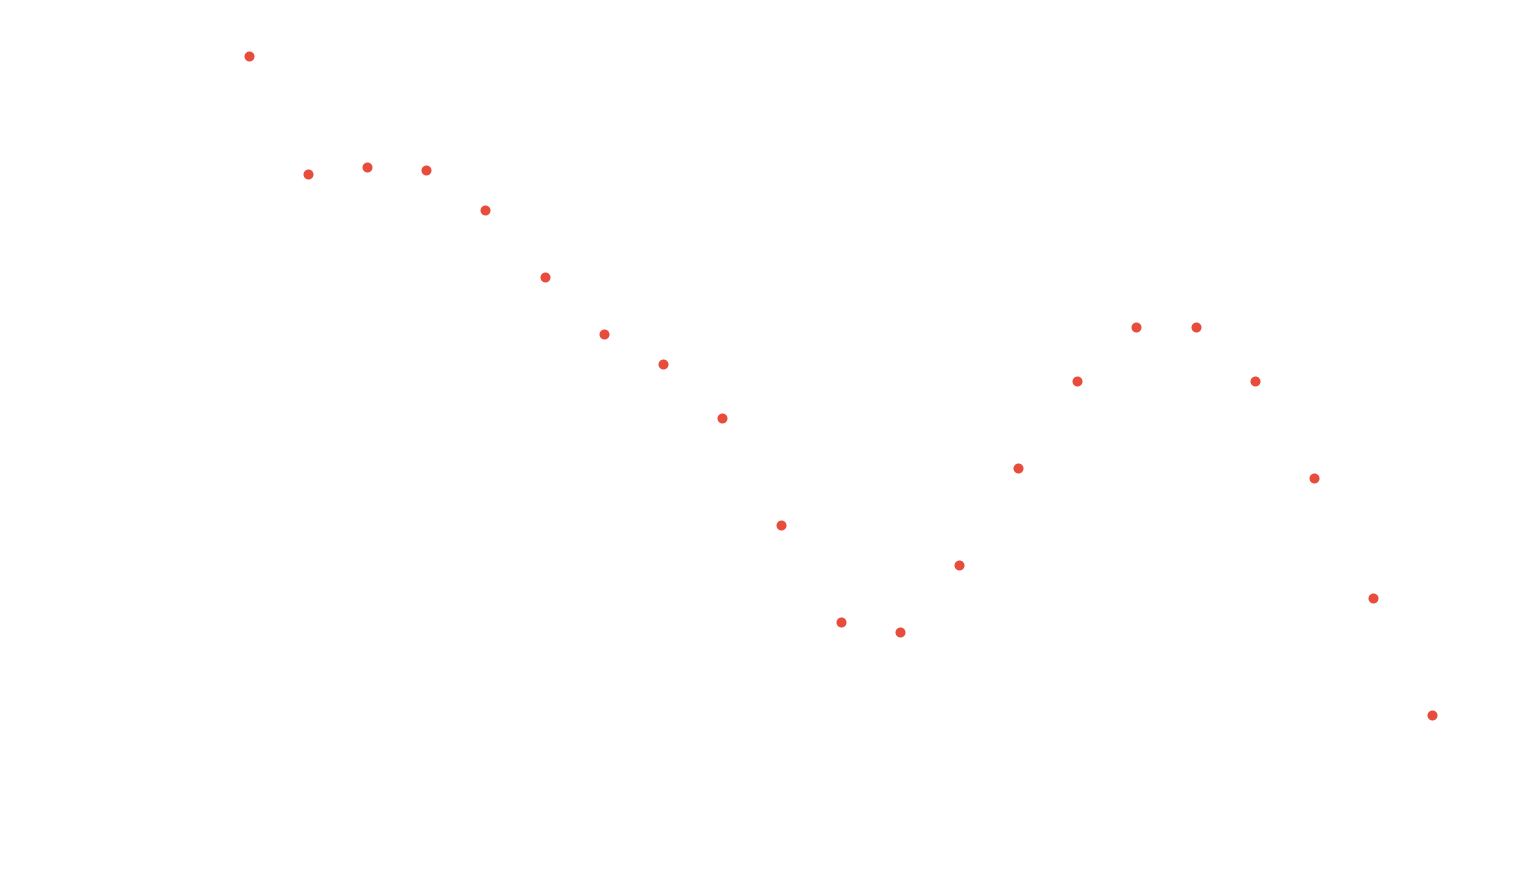

In [98]:
xs = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 
      5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
ys = [0.2, 0.165, 0.167, 0.166, 0.154, 0.134, 0.117, 
      0.108, 0.092, 0.06, 0.031, 0.028, 0.048, 0.077, 
      0.103, 0.119, 0.119, 0.103, 0.074, 0.038, 0.003]

plt.scatter(xs,ys)
plt.xlabel("x")
plt.ylabel("Observed PDF")

Assuming this continous functions with spares observation, how we fill in this blank

In [101]:
inter.splrep(xs,ys)

(array([ 0. ,  0. ,  0. ,  0. ,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,
         4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. , 10. ,
        10. , 10. , 10. ]),
 array([0.2       , 0.15367953, 0.16914093, 0.16787193, 0.15568859,
        0.1333737 , 0.11481659, 0.10935993, 0.09574368, 0.05966536,
        0.02559489, 0.02395509, 0.04658477, 0.07770585, 0.10459185,
        0.12192674, 0.12170117, 0.10526858, 0.06520984, 0.02414508,
        0.003     , 0.        , 0.        , 0.        , 0.        ]),
 3)

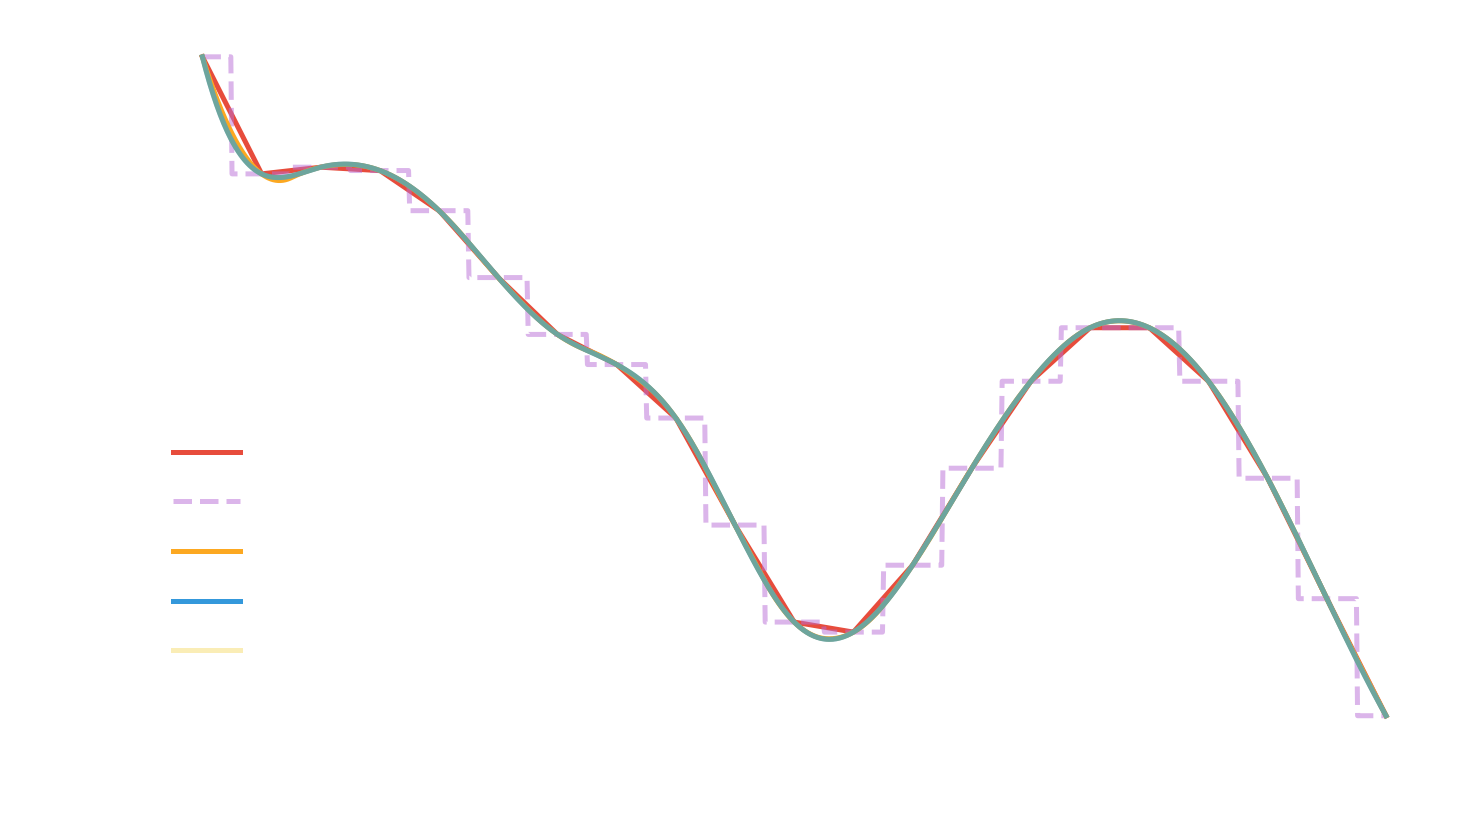

In [100]:
x = np.linspace(min(xs), max(xs), 1000)
y1 = inter.interp1d(xs, ys)(x)
y2 = inter.interp1d(xs, ys,kind="nearest")(x)
y3 = inter.interp1d(xs, ys,kind="quadratic")(x)
y4 = inter.interp1d(xs, ys,kind="cubic")(x)
y5 = inter.splev(x,inter.splrep(xs,ys))

plt.scatter(xs,ys,label="Data",marker="o",c="w",s=20)
plt.plot(x,y1,label="linear(default)")
plt.plot(x,y2,label="nearst",alpha=0.5)
plt.plot(x,y3,label="quadratic",ls="-")
plt.plot(x,y4,label="cubic",ls="-")
plt.plot(x,y5,label="Spline",ls="-",alpha=0.3)
plt.legend()

Using the `interp1d` we can now find a probability value for any `x` value.

How can we calculate the CDF and the probability we would find a value between two bounds? Using `scipy.integrate`. Scipy to the rescue once again!

We have many options:

* `scipy.integrate.trapz` for low accuracy but high speed. Accuracy scales as `O(h)`
* `scipy.integrate.simps` for medium accuracy and pretty high speed. Accuracy scales as `O(h^2)`
* `scipy.integrate.quad` for high accuracy and low sped. Arbitrary accuracy.

There are a few more functions, look them up if you're curious.

In [86]:
from scipy.integrate import trapz, simps, quad

def get_prob(xs,ys,a,b,resolution=1000):
    x_norm=np.linspace(min(xs),max(xs),resolution)
    y_norm=inter.interp1d(xs,ys,kind="quadratic")(x_norm)
    normalisation=simps(y_norm,x_norm)
    x=np.linspace(a,b,resolution)
    y=inter.interp1d(xs,ys,kind="quadratic")(x)
    return simps(y,x)/normalisation

def get_cdf(xs,ys,v):
    return get_prob(xs,ys,min(xs),v)

def get_sf(xs,ys,v):    
    return 1-get_cdf(xs,ys,v)
print(get_prob(xs,ys,0,10))
print(get_cdf(xs,ys,5))
print(get_sf(xs,ys,5))

1.0
0.6367816621604532
0.3632183378395468


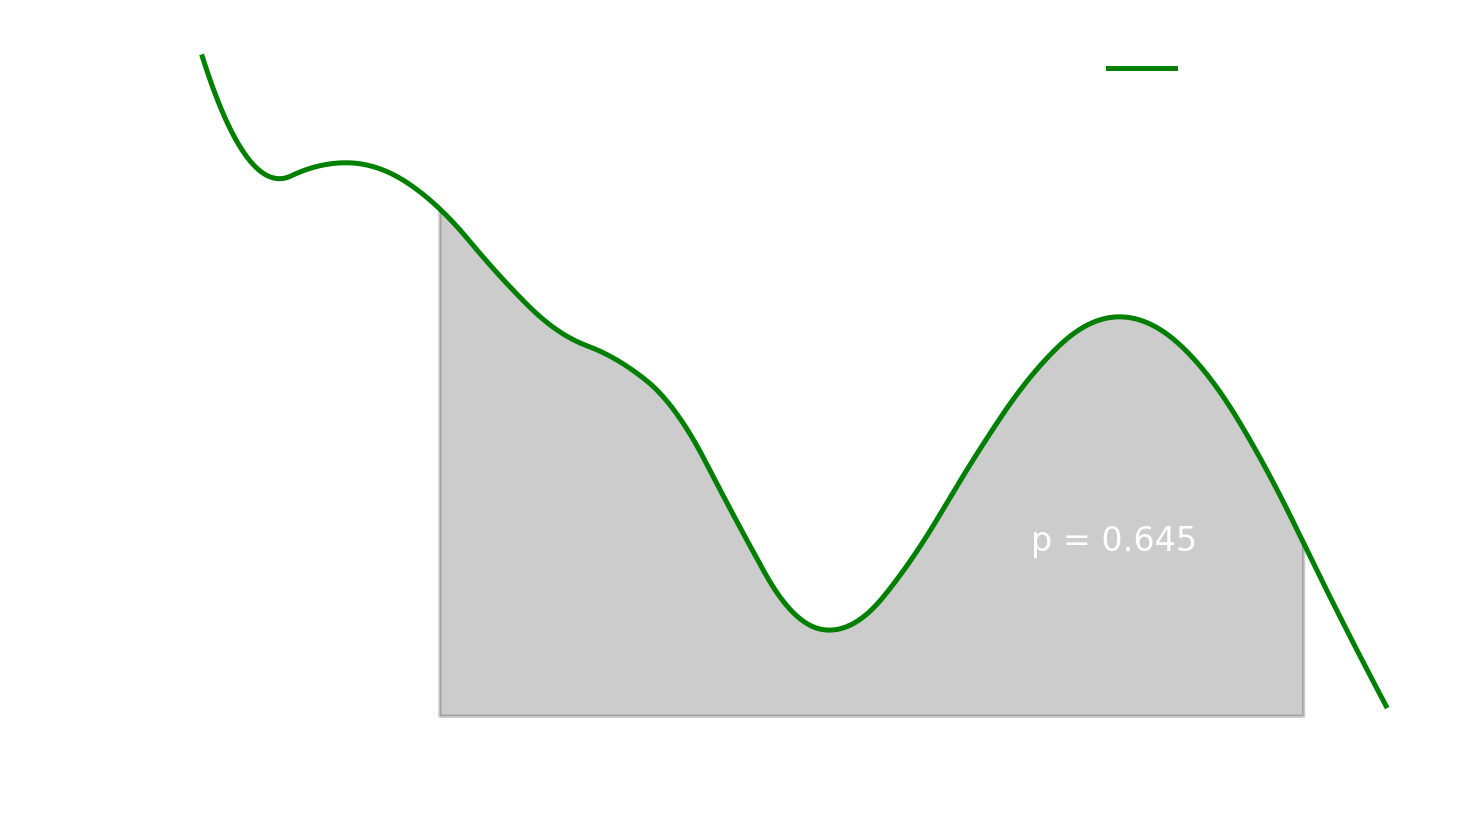

In [106]:
v1,v2 = 2, 9.3

area = get_prob(xs,ys,v1,v2)

plt.scatter(xs,ys,s=30,label="data",color="w")
plt.plot(x,y3,label="Interpolation",c="g")
plt.fill_between(x,0,y3,where=(x>=v1)&(x<=v2),alpha=0.2,color="k")
plt.annotate(f"p = {area:.3f}",(7,0.05))
plt.legend();

c:\users\a3xr4zz\appdata\local\programs\python\python37\lib\site-packages\scipy\integrate\_quadrature.py:414: RuntimeWarning: invalid value encountered in true_divide
  h0divh1 = h0 / h1
c:\users\a3xr4zz\appdata\local\programs\python\python37\lib\site-packages\scipy\integrate\_quadrature.py:416: RuntimeWarning: invalid value encountered in true_divide
  y[slice1] * (hsum * hsum / hprod) +


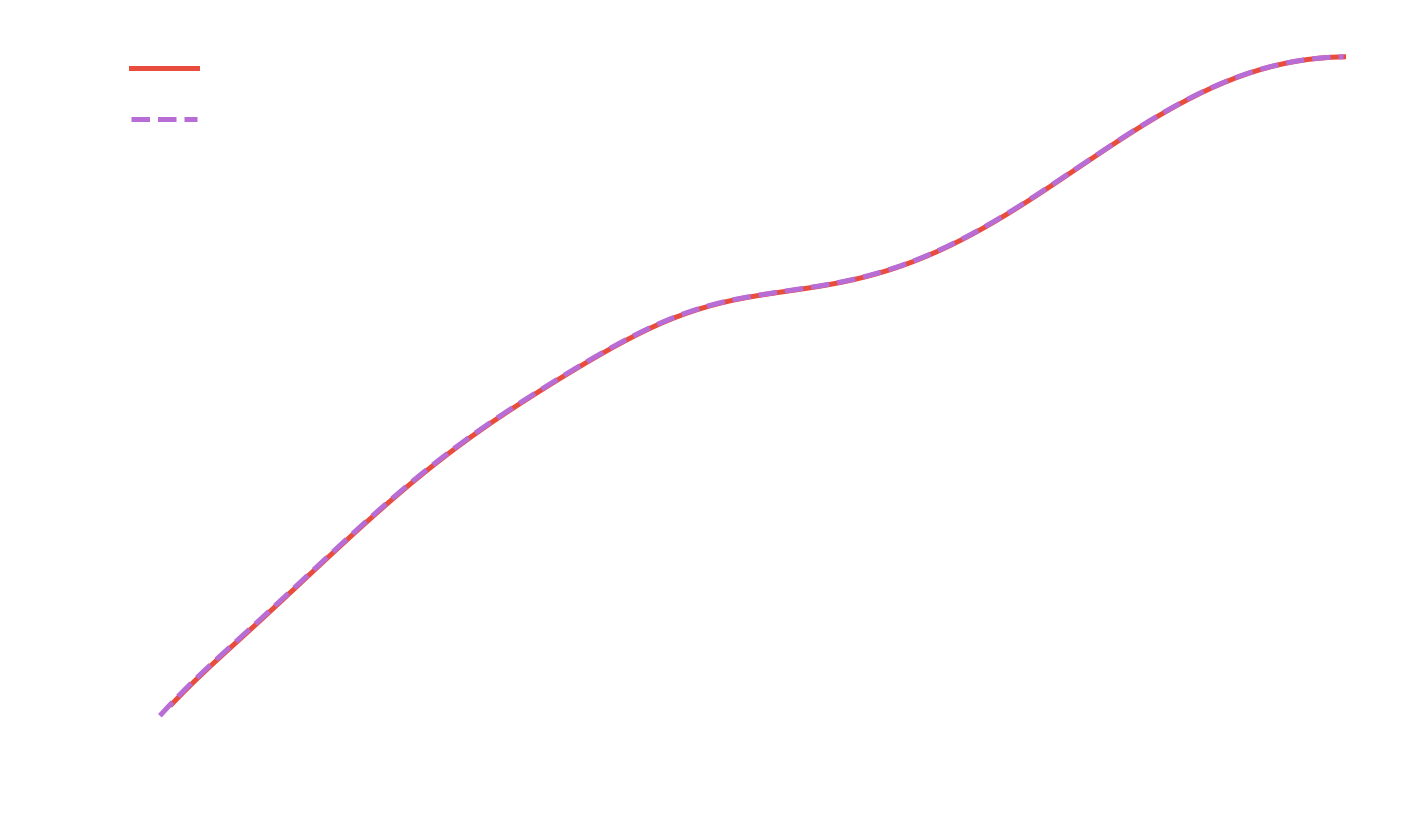

In [95]:
x_new=np.linspace(min(xs),max(xs),100)
cdf_new=[get_cdf(xs,ys,i) for i in x_new]
cheap_cdf=y3.cumsum()/y3.sum()

plt.plot(x_new,cdf_new,label="cdf_new")
plt.plot(x,cheap_cdf,label="cheap_cdf")
plt.legend();